In [1]:
import numpy as np
np.random.seed(800)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pickle
# ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
print(os.listdir('../data/CCMT/'))
print("No of classes:",len(os.listdir('../data/CCMT/')))

['cashew_anthracnose', 'cashew_gumosis', 'cashew_healthy', 'cashew_leaf_miner', 'cashew_red_rust', 'cassava_bacterial_blight', 'cassava_brown_spot', 'cassava_green_mite', 'cassava_healthy', 'cassava_mosaic', 'maize_fall_armyworm', 'maize_grasshoper', 'maize_healthy', 'maize_leaf_beetle', 'maize_leaf_blight', 'maize_leaf_spot', 'maize_streak_virus', 'tomato_healthy', 'tomato_leaf_blight', 'tomato_leaf_curl', 'tomato_septoria_leaf_spot', 'tomato_verticulium_wilt']
No of classes: 22


In [3]:
root_dir = '../data/CCMT'
total_images = 0
for i in os.listdir(root_dir):
    temp_len = len(os.listdir(os.path.join(root_dir, i)))
    total_images += temp_len
    print("Number of images in", i, "class are", temp_len)
print("Total no of in the dataset are", total_images)

Number of images in cashew_anthracnose class are 977
Number of images in cashew_gumosis class are 392
Number of images in cashew_healthy class are 990
Number of images in cashew_leaf_miner class are 1008
Number of images in cashew_red_rust class are 1080
Number of images in cassava_bacterial_blight class are 1349
Number of images in cassava_brown_spot class are 1114
Number of images in cassava_green_mite class are 1015
Number of images in cassava_healthy class are 1055
Number of images in cassava_mosaic class are 1001
Number of images in maize_fall_armyworm class are 285
Number of images in maize_grasshoper class are 673
Number of images in maize_healthy class are 206
Number of images in maize_leaf_beetle class are 936
Number of images in maize_leaf_blight class are 997
Number of images in maize_leaf_spot class are 1038
Number of images in maize_streak_virus class are 967
Number of images in tomato_healthy class are 466
Number of images in tomato_leaf_blight class are 1074
Number of im

In [4]:
folders_list = os.listdir(root_dir)
SIZE = 150
data = []
labels = []
label_index = -1

In [5]:
with open('parrot1.pkl', 'rb') as f1:
    data = pickle.load(f1)
with open('parrot2.pkl', 'rb') as f2:
    labels = pickle.load(f2)

In [5]:
for i in folders_list:
    label_index += 1
    temp_images = os.listdir(os.path.join(root_dir, i))
    for image_name in temp_images:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(os.path.join(root_dir, i, image_name))
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            data.append(np.array(image))
            labels.append(label_index)

In [7]:
# print(data[:5])
print(labels[:5])

[array([[[ 32,  73,  58],
        [ 35,  75,  59],
        [ 35,  74,  58],
        ...,
        [177, 175, 175],
        [179, 175, 176],
        [180, 175, 176]],

       [[ 30,  71,  56],
        [ 33,  74,  58],
        [ 35,  74,  59],
        ...,
        [176, 174, 174],
        [179, 174, 175],
        [180, 175, 176]],

       [[ 30,  69,  54],
        [ 35,  74,  59],
        [ 38,  76,  62],
        ...,
        [177, 174, 175],
        [180, 175, 176],
        [180, 175, 176]],

       ...,

       [[225, 221, 220],
        [225, 221, 220],
        [226, 221, 220],
        ...,
        [200, 197, 193],
        [197, 194, 190],
        [197, 194, 190]],

       [[225, 223, 218],
        [225, 221, 218],
        [224, 219, 217],
        ...,
        [202, 199, 194],
        [200, 196, 191],
        [198, 194, 190]],

       [[224, 223, 218],
        [225, 221, 217],
        [224, 219, 216],
        ...,
        [204, 201, 196],
        [204, 200, 195],
        [202, 198, 193]

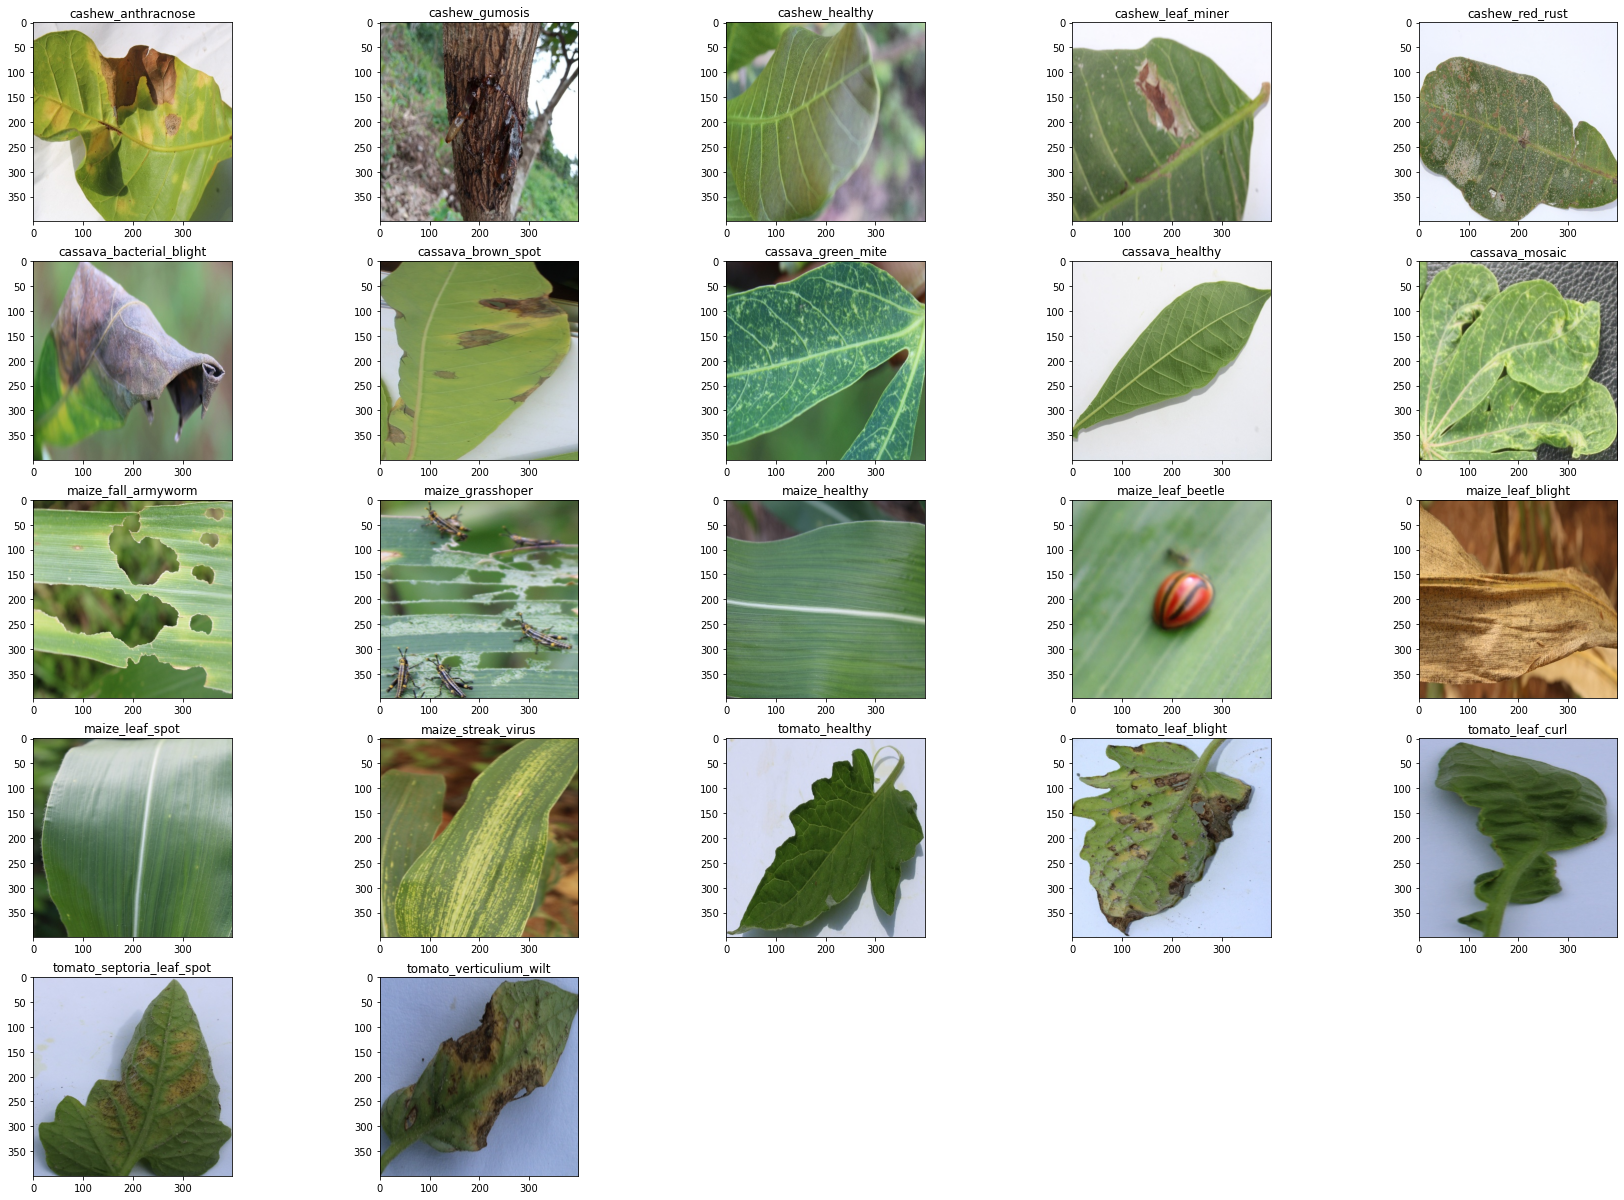

In [7]:
classes = os.listdir(root_dir)
plt.figure(figsize=(30, 30))
for i in range(22):
    plt.subplot(7, 5, i + 1)
    temp_images = os.listdir(os.path.join(root_dir, classes[i]))
    img = plt.imread(os.path.join(root_dir, classes[i] ,temp_images[5]))
    plt.title(classes[i])
    plt.imshow(img)
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, to_categorical(np.array(labels)), test_size = 0.20, random_state = 42)

In [9]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

15341
3836
15341
3836


In [10]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (5,5), padding='SAME', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(22, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [11]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
trained_model = model.fit(np.array(x_train), y_train, epochs = 12, batch_size=64, validation_split = 0.1, shuffle = False)

Epoch 1/12


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/dense/MatMul/MatMul_1' defined at (most recent call last):
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 374, in dispatch_queue
      yield self.process_one()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 250, in wrapper
      runner = Runner(ctx_run, result, future, yielded)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 748, in __init__
      self.ctx_run(self.run)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-12-e8ef91054a54>", line 1, in <module>
      trained_model = model.fit(np.array(x_train), y_train, epochs = 12, batch_size=64, validation_split = 0.1, shuffle = False)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/dense/MatMul/MatMul_1'
OOM when allocating tensor with shape[87616,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential/dense/MatMul/MatMul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1043]

In [ ]:
loss, acc = model.evaluate(test_dataset)
print(loss)
print(acc*100, "%", sep="")

In [ ]:
plt.plot(trained_model.history['loss'])
plt.legend('Training')
plt.title('Training loss')
plt.xlabel('epoch')

In [13]:
with open('parrot1.pkl', 'wb') as f1:
    pickle.dump(data, f1)
with open('parrot2.pkl', 'wb') as f2:
    pickle.dump(labels, f2)